In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Data/prepared_data2.csv')

In [3]:
df.sort_values(by='Date', inplace=True)

In [4]:
df

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,Team2_top
0,2020-11-14,fnatic,MAD Lions,Vertigo,30.0,1,EU,EU,4.0,30.0,-159.0,1.00,26.0,235.0,1.11,107.0,134.0
1,2020-11-14,Nexus,SKADE,Nuke,26.0,2,EU,EU,1.0,41.0,-162.0,1.01,29.0,262.0,1.12,20.0,20.0
2,2020-11-14,Secret,HellRaisers,Mirage,25.0,2,EU,CIS,1.0,27.0,-55.0,1.01,37.0,-76.0,1.05,20.0,20.0
3,2020-11-14,HellRaisers,Secret,Dust2,30.0,1,CIS,EU,1.0,37.0,-76.0,1.05,27.0,-55.0,1.01,20.0,20.0
4,2020-11-14,SKADE,Nexus,Train,21.0,1,EU,EU,1.0,29.0,262.0,1.12,41.0,-162.0,1.01,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,2021-11-12,forZe,ENCE,Nuke,24.0,1,CIS,EU,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0
5169,2021-11-12,MOUZ,MAD Lions,Dust2,29.0,2,EU,EU,3.0,27.0,173.0,1.07,27.0,102.0,1.07,182.0,134.0
5179,2021-11-12,forZe,ENCE,Mirage,26.0,1,CIS,EU,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0
5173,2021-11-12,Copenhagen Flames,Dignitas,Inferno,28.0,1,EU,EU,3.0,29.0,52.0,1.05,14.0,-156.0,0.95,267.0,103.0


In [10]:
dataset = pd.get_dummies(df.drop(columns=['Total_rounds', 'Date', 'Team1', 'Team2']), prefix=['T1_region', 'T2_region','Map'],
                        columns=['Team1_region', 'Team2_region', 'Map'])

In [11]:
dataset

,winner,Importance,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,Team2_top,...,T2_region_Oceania,T2_region_SA,Map_Ancient,Map_Dust2,Map_Inferno,Map_Mirage,Map_Nuke,Map_Overpass,Map_Train,Map_Vertigo
0,1,4.0,30.0,-159.0,1.00,26.0,235.0,1.11,107.0,134.0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,41.0,-162.0,1.01,29.0,262.0,1.12,20.0,20.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,27.0,-55.0,1.01,37.0,-76.0,1.05,20.0,20.0,...,0,0,0,0,0,1,0,0,0,0
3,1,1.0,37.0,-76.0,1.05,27.0,-55.0,1.01,20.0,20.0,...,0,0,0,1,0,0,0,0,0,0
4,1,1.0,29.0,262.0,1.12,41.0,-162.0,1.01,20.0,20.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,1,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0,...,0,0,0,0,0,0,1,0,0,0
5169,2,3.0,27.0,173.0,1.07,27.0,102.0,1.07,182.0,134.0,...,0,0,0,1,0,0,0,0,0,0
5179,1,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0,...,0,0,0,0,0,1,0,0,0,0
5173,1,3.0,29.0,52.0,1.05,14.0,-156.0,0.95,267.0,103.0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
import numpy as np 
train_set, test_set= np.split(dataset, [int(.75 *len(dataset))])

In [13]:
x_train = train_set.drop(columns=['winner'])
y_train = train_set.winner
x_test = test_set.drop(columns=['winner'])
y_test = test_set.winner

In [14]:
x_test

,Importance,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,Team2_top,T1_region_Asia,...,T2_region_Oceania,T2_region_SA,Map_Ancient,Map_Dust2,Map_Inferno,Map_Mirage,Map_Nuke,Map_Overpass,Map_Train,Map_Vertigo
3893,1.0,5.0,-89.0,0.87,6.0,35.0,1.07,460.0,89.0,0,...,0,0,0,0,0,0,0,1,0,0
3888,1.0,15.0,-114.0,0.96,3.0,8.0,1.08,20.0,358.0,0,...,0,0,1,0,0,0,0,0,0,0
3884,1.0,7.0,-11.0,1.02,13.0,-46.0,1.00,267.0,20.0,0,...,0,1,0,0,0,1,0,0,0,0
3886,1.0,5.0,-89.0,0.87,6.0,35.0,1.07,460.0,89.0,0,...,0,0,0,0,0,1,0,0,0,0
3885,1.0,6.0,35.0,1.07,5.0,-89.0,0.87,89.0,460.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0,0,...,0,0,0,0,0,0,1,0,0,0
5169,3.0,27.0,173.0,1.07,27.0,102.0,1.07,182.0,134.0,0,...,0,0,0,1,0,0,0,0,0,0
5179,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0,0,...,0,0,0,0,0,1,0,0,0,0
5173,3.0,29.0,52.0,1.05,14.0,-156.0,0.95,267.0,103.0,0,...,0,0,0,0,1,0,0,0,0,0


# Random Forest

In [16]:
rfc = RandomForestClassifier(random_state= 0, max_depth=12)

In [17]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=0)

In [18]:
pred_train = rfc.predict(x_train)

In [19]:
from sklearn import metrics

In [20]:
pscore_train = metrics.accuracy_score(y_train, pred_train)

In [21]:
pscore_train

0.9248391248391249

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


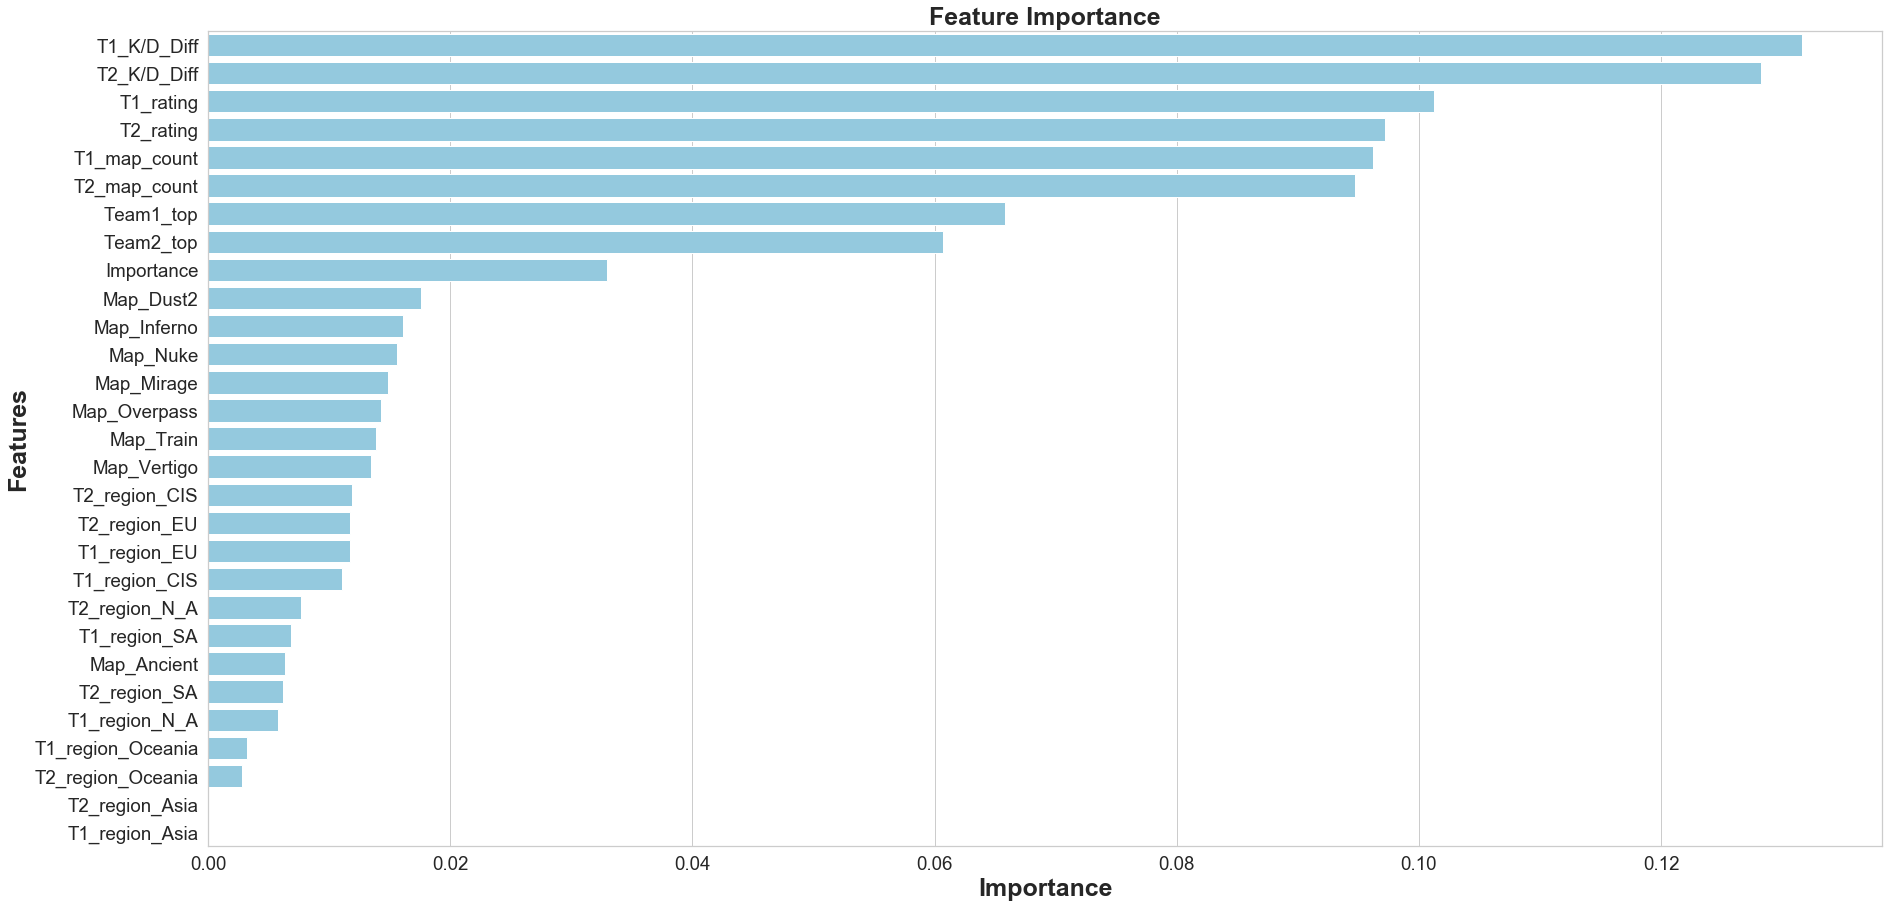

None

In [23]:
feats = {}
for feature, importance in zip(dataset.drop(columns='winner').columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [24]:
predictions = rfc.predict(x_test)

In [25]:
pscore = metrics.accuracy_score(y_test, predictions)

In [26]:
pscore

0.6234567901234568

In [27]:
metrics.confusion_matrix(y_test, predictions)

array([[291, 301],
       [187, 517]], dtype=int64)

# Random Forest с масштабированием данных

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [30]:
x_train_scaled

array([[ 1.71451615,  0.08078111, -1.35617187, ..., -0.38344853,
        -0.3258946 ,  2.83088698],
       [-1.12675866,  0.84981228, -1.37248966, ..., -0.38344853,
        -0.3258946 , -0.35324618],
       [-1.12675866, -0.12895466, -0.79048831, ..., -0.38344853,
        -0.3258946 , -0.35324618],
       ...,
       [-1.12675866, -1.52719315, -0.55116065, ..., -0.38344853,
        -0.3258946 ,  2.83088698],
       [-1.12675866, -1.03780968,  0.2647291 , ..., -0.38344853,
        -0.3258946 , -0.35324618],
       [-1.12675866, -0.96789775, -0.68170301, ..., -0.38344853,
        -0.3258946 , -0.35324618]])

In [31]:
rfc2 = RandomForestClassifier(random_state= 0, max_depth=12)

In [32]:
rfc2.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=12, random_state=0)

In [33]:
pred_train = rfc2.predict(x_train_scaled)

In [34]:
pscore_train = metrics.accuracy_score(y_train, pred_train)

In [35]:
pscore_train

0.9248391248391249

In [36]:
pred2 = rfc2.predict(x_test_scaled)

In [37]:
pscore2 = metrics.accuracy_score(y_test, pred2)

In [38]:
pscore2

0.6195987654320988

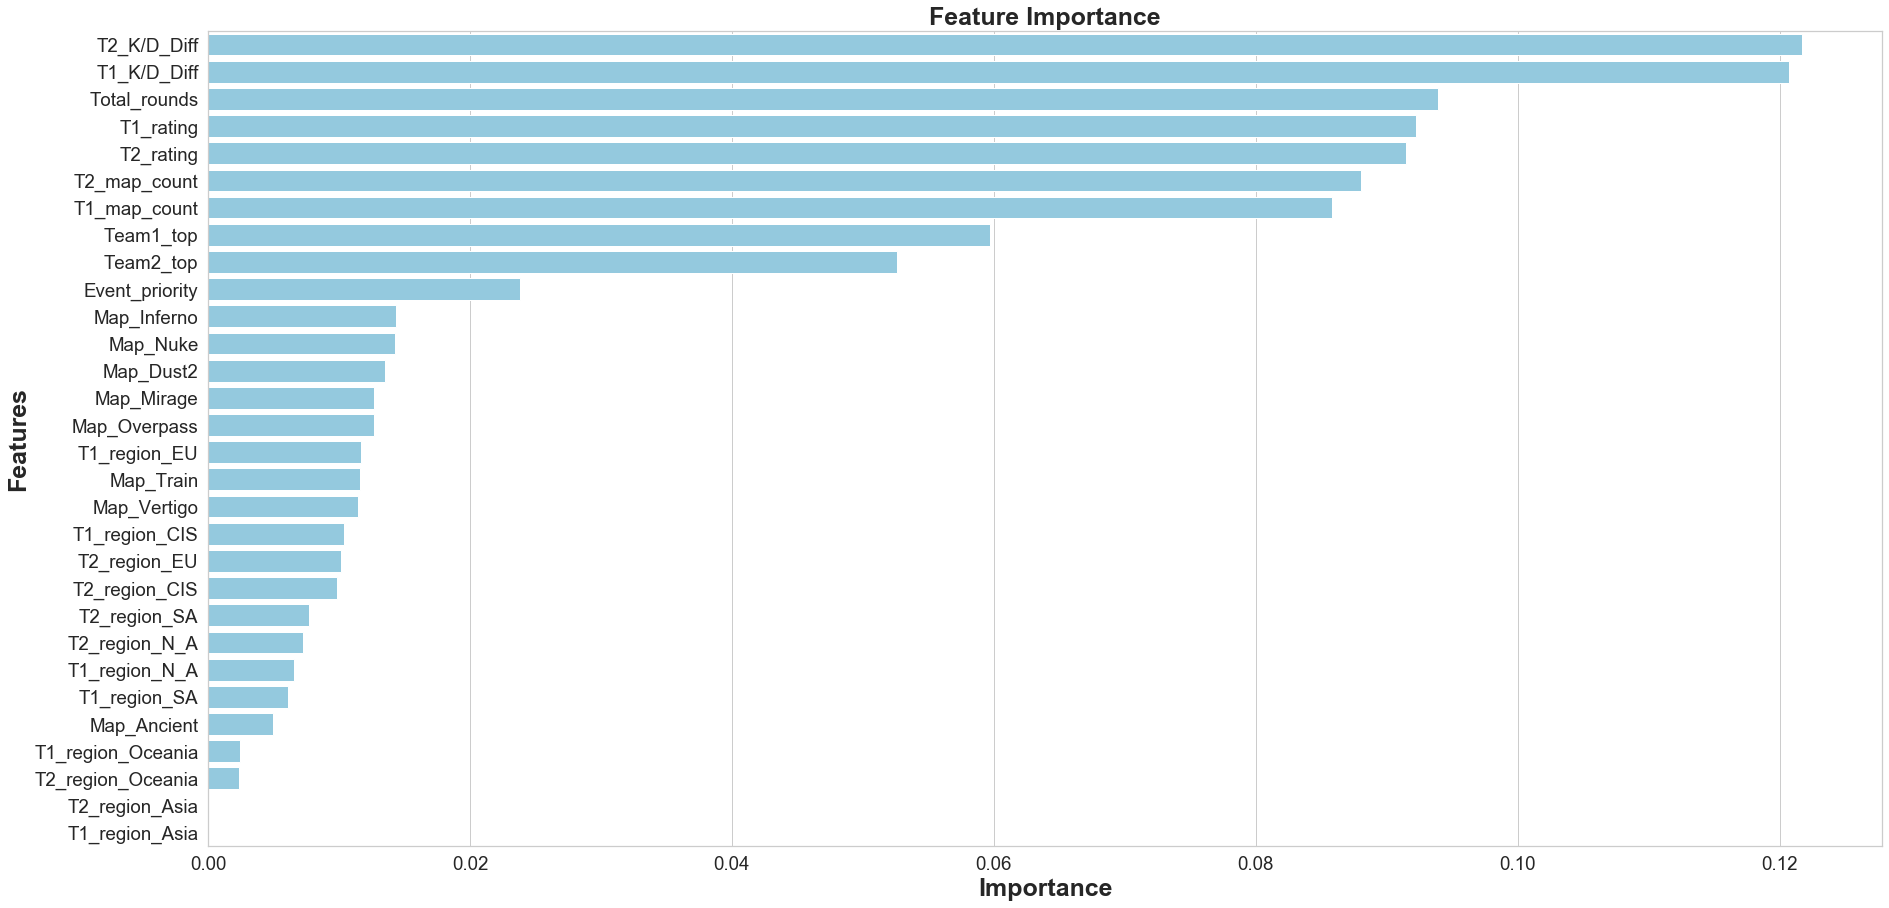

None

In [96]:
feats = {}
for feature, importance in zip(dataset.drop(columns='winner').columns, rfc2.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

# Random Forest с меньшим количеством признаков

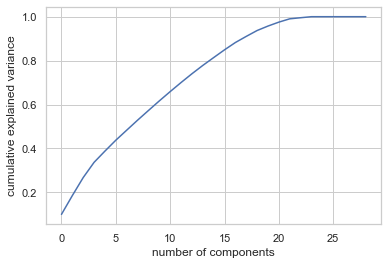

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.099650,0.099650
1,0.185172,0.085522
2,0.267339,0.082167
3,0.336609,0.069270
4,0.387848,0.051238
5,0.437410,0.049563
6,0.483047,0.045636
7,0.528571,0.045524
8,0.572672,0.044101
9,0.616438,0.043766


In [39]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=29)
pca_test.fit(x_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

In [40]:
pca = PCA(n_components=20)
pca.fit(x_train_scaled)
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

In [41]:
rfc3 = RandomForestClassifier(random_state=0, max_depth=12)
rfc3.fit(x_train_scaled_pca, y_train)
rfc3.score(x_train_scaled_pca, y_train)

0.9423423423423424

In [42]:
pred3 = rfc3.predict(x_test_scaled_pca)

In [43]:
pscore3 = metrics.accuracy_score(y_test, pred3)

In [44]:
pscore3

0.6026234567901234

# Попытка оптимизации гиперпараметров

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 5)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(x_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 18,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': False}

In [105]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,200,12,18,log2,11,False,0.619820,1
1,100,18,23,sqrt,8,False,0.616988,2
2,700,18,2,log2,11,True,0.615959,3
3,700,50,18,sqrt,15,True,0.615444,4
4,800,12,34,log2,8,False,0.615444,4
...,...,...,...,...,...,...,...,...
95,100,2,12,log2,1,False,0.570399,96
96,900,34,18,log2,1,False,0.569884,97
97,400,39,50,log2,1,True,0.566281,98
98,600,28,39,log2,1,True,0.564736,99


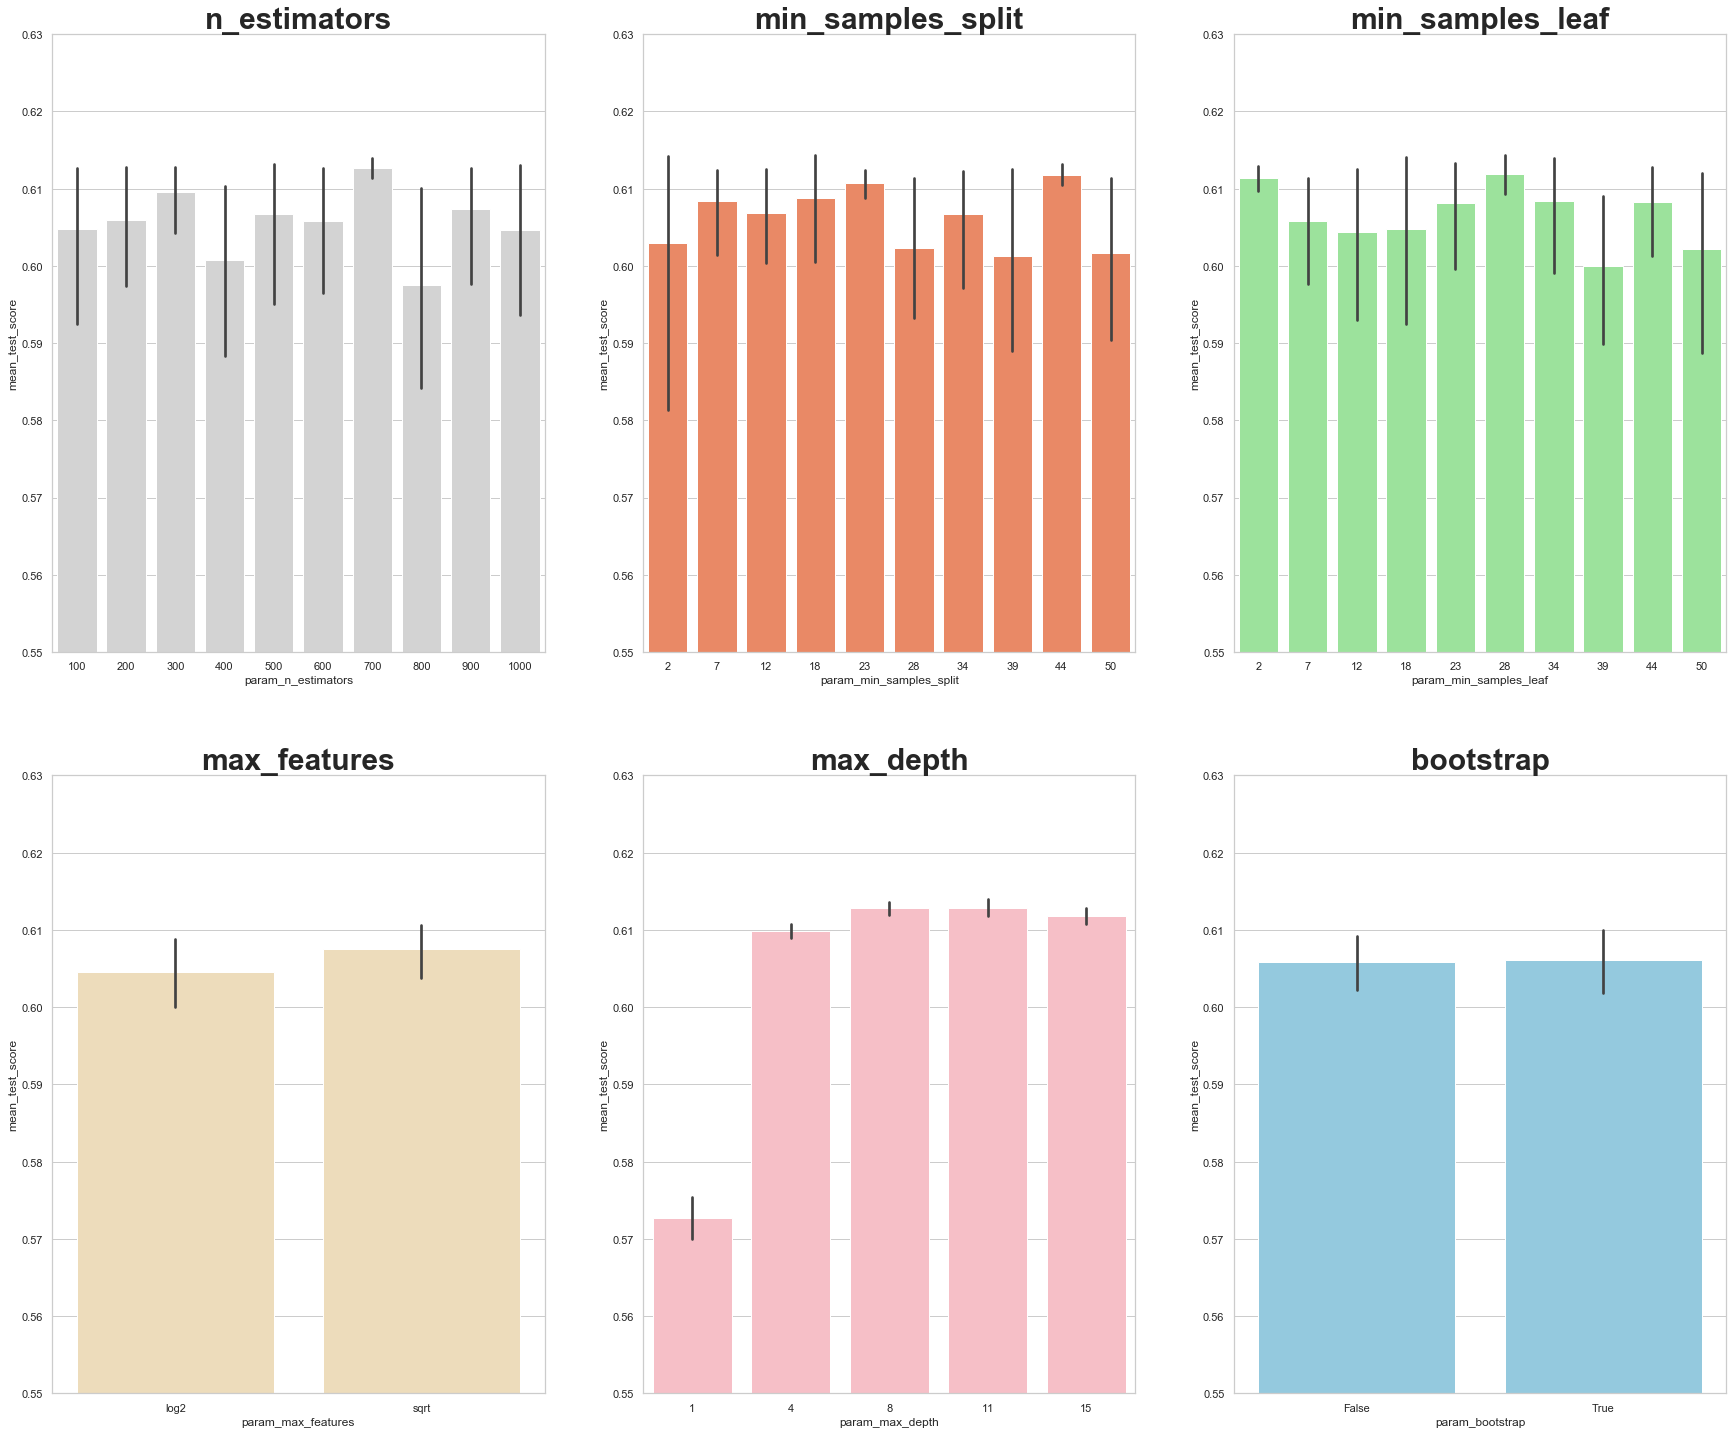

In [106]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.55,.63]) 
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.55,.63]) 
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.55,.63]) 
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.55,.63]) 
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.55,.63]) 
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.55,.63])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

# RF по данным с единственной карты

In [107]:
data_inf = dataset.loc[df['Map'] == 'Inferno']

In [108]:
data_inf = data_inf.iloc[:, :-8]

In [109]:
data_inf

,Total_rounds,winner,Event_priority,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,...,T1_region_EU,T1_region_N_A,T1_region_Oceania,T1_region_SA,T2_region_Asia,T2_region_CIS,T2_region_EU,T2_region_N_A,T2_region_Oceania,T2_region_SA
5,27.0,1,3.0,26.0,235.0,1.11,30.0,-159.0,1.00,21.0,...,1,0,0,0,0,0,1,0,0,0
11,36.0,1,2.0,35.0,254.0,1.10,33.0,277.0,1.11,30.0,...,0,0,0,0,0,0,1,0,0,0
31,27.0,2,3.0,37.0,-6.0,1.03,46.0,340.0,1.10,30.0,...,0,0,0,0,0,0,1,0,0,0
45,27.0,2,3.0,37.0,29.0,1.05,38.0,47.0,1.04,9.0,...,1,0,0,0,0,1,0,0,0,0
42,27.0,2,3.0,54.0,-222.0,1.01,31.0,-32.0,1.03,30.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,23.0,2,2.0,30.0,-29.0,1.02,24.0,18.0,1.03,30.0,...,0,0,0,0,0,0,1,0,0,0
5132,23.0,2,2.0,20.0,39.0,1.04,18.0,108.0,1.08,24.0,...,0,0,0,0,0,0,1,0,0,0
5150,27.0,1,2.0,29.0,-87.0,1.02,24.0,263.0,1.13,30.0,...,1,0,0,0,0,0,1,0,0,0
5142,20.0,2,1.0,18.0,-143.0,0.96,14.0,178.0,1.15,30.0,...,0,0,0,0,0,0,1,0,0,0


In [110]:
train_set_inf, test_set_inf= np.split(data_inf, [int(.75 *len(data_inf))])

In [111]:
x_train_inf = train_set_inf.drop(columns=['winner'])
y_train_inf = train_set_inf.winner
x_test_inf = test_set_inf.drop(columns=['winner'])
y_test_inf = test_set_inf.winner

In [112]:
x_test_inf

,Total_rounds,Event_priority,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,Team2_top,...,T1_region_EU,T1_region_N_A,T1_region_Oceania,T1_region_SA,T2_region_Asia,T2_region_CIS,T2_region_EU,T2_region_N_A,T2_region_Oceania,T2_region_SA
3881,21.0,1.0,4.0,87.0,1.22,5.0,-55.0,0.95,13.0,2.0,...,1,0,0,0,0,0,1,0,0,0
3895,26.0,3.0,24.0,-15.0,1.03,5.0,-35.0,1.01,30.0,30.0,...,1,0,0,0,0,0,1,0,0,0
3915,27.0,1.0,7.0,-73.0,0.95,7.0,-46.0,0.96,25.0,7.0,...,1,0,0,0,0,1,0,0,0,0
3922,30.0,3.0,5.0,-69.0,0.92,7.0,45.0,1.08,17.0,30.0,...,1,0,0,0,0,0,1,0,0,0
3905,36.0,1.0,9.0,57.0,1.09,7.0,63.0,1.11,24.0,13.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,23.0,2.0,30.0,-29.0,1.02,24.0,18.0,1.03,30.0,17.0,...,0,0,0,0,0,0,1,0,0,0
5132,23.0,2.0,20.0,39.0,1.04,18.0,108.0,1.08,24.0,30.0,...,0,0,0,0,0,0,1,0,0,0
5150,27.0,2.0,29.0,-87.0,1.02,24.0,263.0,1.13,30.0,18.0,...,1,0,0,0,0,0,1,0,0,0
5142,20.0,1.0,18.0,-143.0,0.96,14.0,178.0,1.15,30.0,30.0,...,0,0,0,0,0,0,1,0,0,0


In [113]:
rfc = RandomForestClassifier(random_state= 0, max_depth=12)

In [114]:
rfc.fit(x_train_inf, y_train_inf)

RandomForestClassifier(max_depth=12, random_state=0)

In [115]:
pred_train = rfc.predict(x_train_inf)

In [116]:
pscore_train = metrics.accuracy_score(y_train_inf, pred_train)

In [117]:
pscore_train

0.9985507246376811

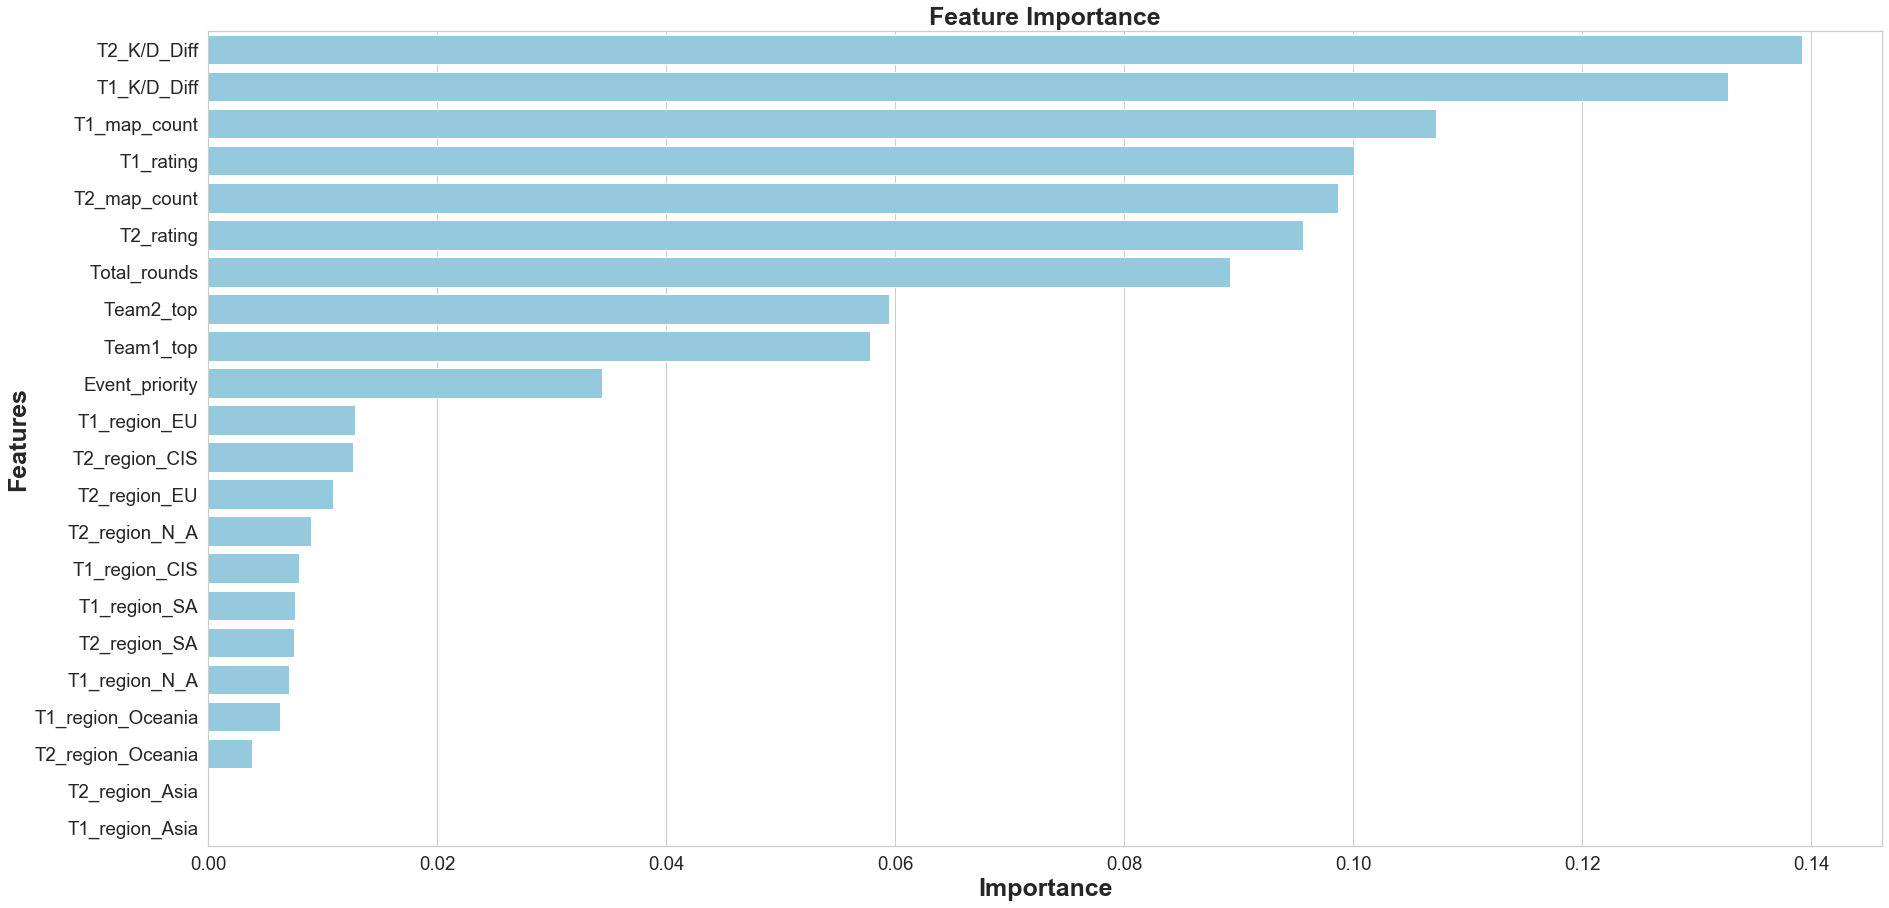

None

In [118]:
feats = {}
for feature, importance in zip(data_inf.drop(columns='winner').columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [119]:
predictions = rfc.predict(x_test_inf)

In [120]:
pscore_inf = metrics.accuracy_score(y_test_inf, predictions)

In [121]:
pscore

0.6118827160493827

In [122]:
pscore2

0.6126543209876543

In [123]:
pscore3

0.6134259259259259

In [124]:
pscore_inf

0.6130434782608696

# Попытка спрогнозировать тотал раундов

In [45]:
dataset2 = pd.get_dummies(df.drop(columns=['winner', 'Date', 'Team1', 'Team2']), prefix=['T1_region', 'T2_region','Map'],
                        columns=['Team1_region', 'Team2_region', 'Map'])

In [46]:
dataset2['More_26.5'] = np.where(dataset2['Total_rounds'] > 26, 1, 0)

In [48]:
dataset2.drop(columns='Total_rounds', inplace=True)

In [49]:
train_set2, test_set2 = np.split(dataset2, [int(.75 *len(dataset))])

In [52]:
x_train2 = train_set2.drop(columns=['More_26.5'])
y_train2 = train_set2['More_26.5']
x_test2 = test_set2.drop(columns=['More_26.5'])
y_test2 = test_set2['More_26.5']

In [53]:
x_test2

,Importance,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,Team2_top,T1_region_Asia,...,T2_region_Oceania,T2_region_SA,Map_Ancient,Map_Dust2,Map_Inferno,Map_Mirage,Map_Nuke,Map_Overpass,Map_Train,Map_Vertigo
3893,1.0,5.0,-89.0,0.87,6.0,35.0,1.07,460.0,89.0,0,...,0,0,0,0,0,0,0,1,0,0
3888,1.0,15.0,-114.0,0.96,3.0,8.0,1.08,20.0,358.0,0,...,0,0,1,0,0,0,0,0,0,0
3884,1.0,7.0,-11.0,1.02,13.0,-46.0,1.00,267.0,20.0,0,...,0,1,0,0,0,1,0,0,0,0
3886,1.0,5.0,-89.0,0.87,6.0,35.0,1.07,460.0,89.0,0,...,0,0,0,0,0,1,0,0,0,0
3885,1.0,6.0,35.0,1.07,5.0,-89.0,0.87,89.0,460.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0,0,...,0,0,0,0,0,0,1,0,0,0
5169,3.0,27.0,173.0,1.07,27.0,102.0,1.07,182.0,134.0,0,...,0,0,0,1,0,0,0,0,0,0
5179,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0,0,...,0,0,0,0,0,1,0,0,0,0
5173,3.0,29.0,52.0,1.05,14.0,-156.0,0.95,267.0,103.0,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
rfc2 = RandomForestClassifier(random_state= 0)

In [65]:
rfc2.fit(x_train2, y_train2)

RandomForestClassifier(random_state=0)

In [66]:
pred_train2 = rfc2.predict(x_train2)

In [67]:
pscore_train2 = metrics.accuracy_score(y_train2, pred_train2)

In [68]:
pscore_train2

1.0

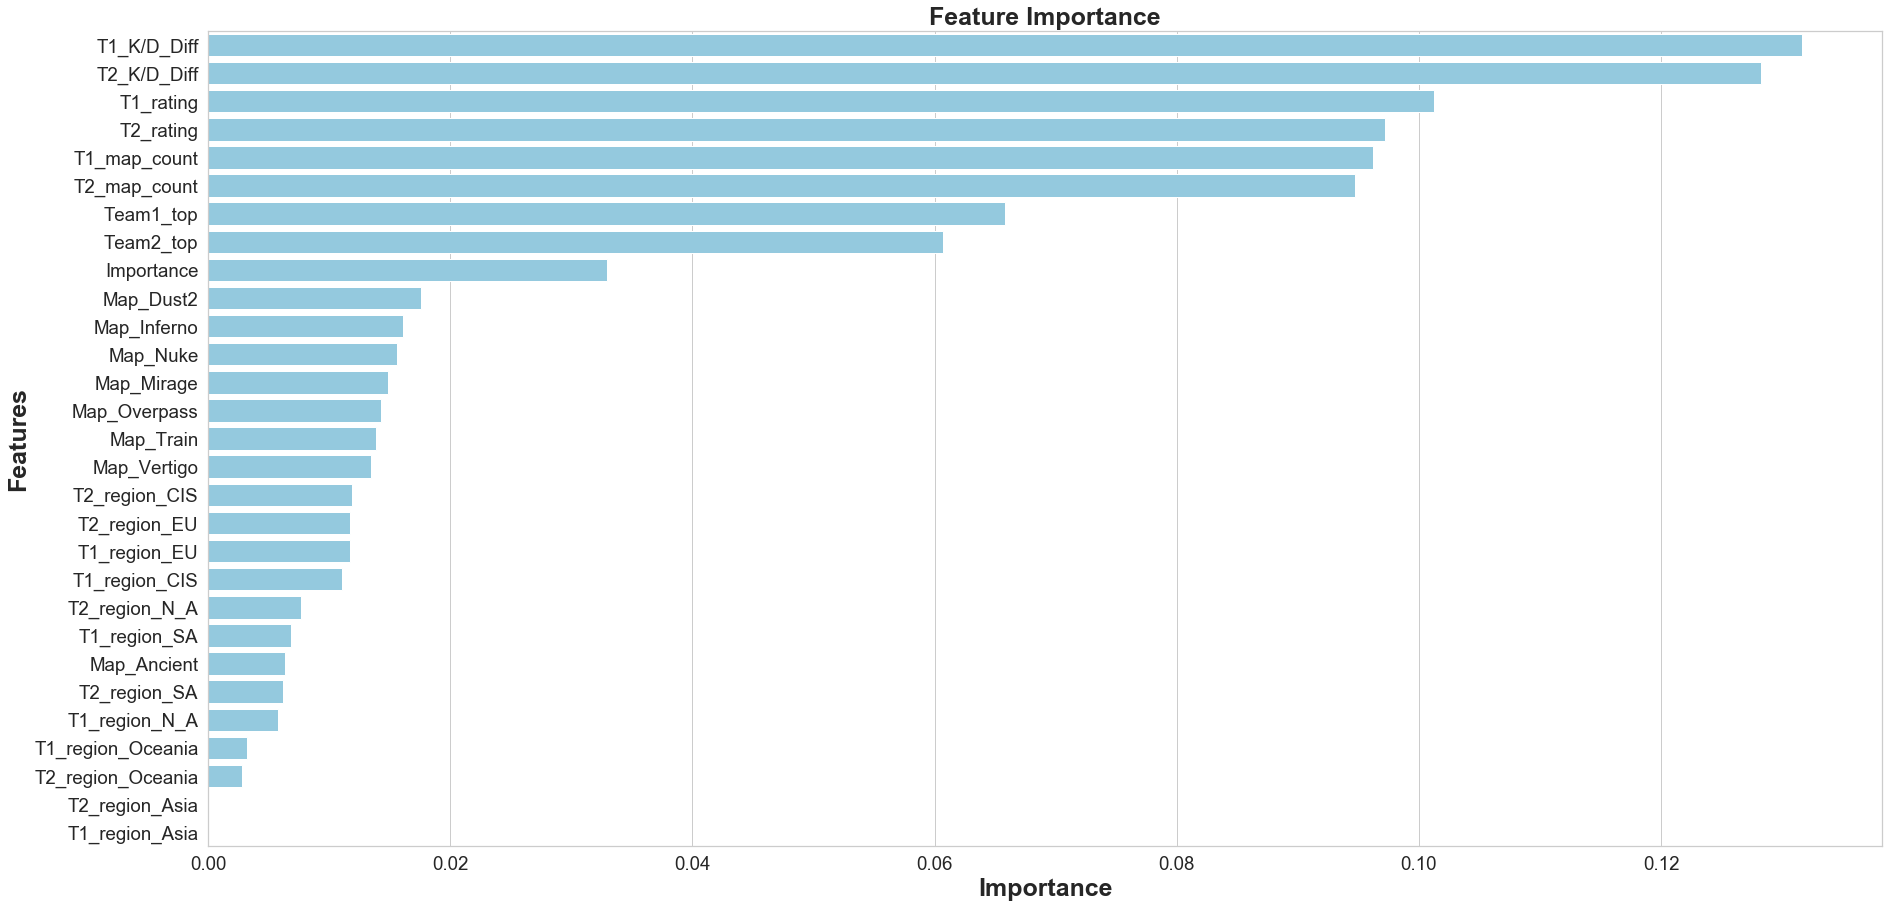

None

In [59]:
feats = {}
for feature, importance in zip(dataset2.drop(columns='More_26.5').columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [69]:
predictions11 = rfc2.predict(x_test2)

In [70]:
pscore11 = metrics.accuracy_score(y_test2, predictions11)

In [71]:
pscore11

0.5030864197530864

In [63]:
metrics.confusion_matrix(y_test2, predictions11)

array([[252, 390],
       [256, 398]], dtype=int64)